# <font size=6 color='green'><center>**IT 496 - Introduction to Data Mining**</center></font>
### **<center>Course Project - 01<br/><br/>Data Preprocessing, EDA and Regression Analysis<center>**

 &emsp; **Group Name : <font color='#0099ff'>DataForce</font>** <br/>
 &emsp; **Group ID : <font color='#0099ff'>T06</font>**
 <br/>&emsp; **Dateset : <font color='#0099ff'>EV Charging Station</font>**

### <center>Introduction </center>

**Dataset Name**: Electric Vehicle(EV) Charging station<br/><br/>
$\hspace{1.5cm}$The EV Charging Station dataset provides the availability, use, and demand for EV charging facilities, which helps researchers, analysts, and businesses better understand the regional EV industry and sustainable transportation methods.Information on charging station locations, available charging connector types, charging session lengths, energy usage, and other pertinent metrics are all included in the data.
<br/><br/>
**Use**: To provide comprehensive insights into the usage patterns of Electric Vehicle(EV) charging stations in the city o f Palo Alto, California<br/>

**Dataset Link**: https://www.kaggle.com/datasets/venkatsairo4899/ev-charging-station-usage-of-california-city

### <center>Exploratory Data Analysis</center>

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [3]:
# replace the csv file path here
dataFilePath = "EVChargingStationUsage.csv"
Data = pd.read_csv(dataFilePath, low_memory = False)
# setting low_memory to false to ignore "mixed data type" warning

Data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3.0,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4.0,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5.0,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6.0,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7.0,94043.0,3765.0,NaN,NaN,NaN


In [4]:
Data.shape

(18139, 33)

Let's check the details of all columns

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18139 entries, 0 to 18138
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Station Name                     18139 non-null  object 
 1   MAC Address                      18139 non-null  object 
 2   Org Name                         18139 non-null  object 
 3   Start Date                       18139 non-null  object 
 4   Start Time Zone                  18139 non-null  object 
 5   End Date                         18139 non-null  object 
 6   End Time Zone                    18139 non-null  object 
 7   Transaction Date (Pacific Time)  18139 non-null  object 
 8   Total Duration (hh:mm:ss)        18139 non-null  object 
 9   Charging Time (hh:mm:ss)         18139 non-null  object 
 10  Energy (kWh)                     18139 non-null  float64
 11  GHG Savings (kg)                 18139 non-null  float64
 12  Gasoline Savings (

In [6]:
Data.describe()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
count,18139.000000,18139.000000,18139.000000,18139.000000,0.0,18139.000000,18138.000000,18138.000000,18138.0,1.813800e+04,17137.000000,17560.000000,0.0,0.0,0.0
mean,6.856587,2.879768,0.860500,1.926126,NaN,94295.853189,37.445206,-122.161541,0.0,4.853272e+07,94394.117640,70887.180239,NaN,NaN,NaN
std,5.607083,2.354979,0.703686,0.261573,NaN,693.178157,0.001154,0.001070,0.0,2.521573e+08,2366.850527,62841.885288,NaN,NaN,NaN
min,0.010033,0.004000,0.001000,1.000000,NaN,943.000000,37.443676,-122.162880,0.0,3.000000e+00,10009.000000,0.000000,NaN,NaN,NaN
25%,3.012503,1.265000,0.378000,2.000000,NaN,94301.000000,37.444489,-122.162308,0.0,9.110000e+02,94086.000000,5717.000000,NaN,NaN,NaN
50%,5.857067,2.460000,0.735000,2.000000,NaN,94301.000000,37.444607,-122.162140,0.0,1.984000e+03,94303.000000,57993.000000,NaN,NaN,NaN
75%,9.349546,3.927000,1.173000,2.000000,NaN,94301.000000,37.446510,-122.160370,0.0,3.082000e+03,95014.000000,133429.000000,NaN,NaN,NaN
max,79.573486,33.421000,9.986000,2.000000,NaN,94301.000000,37.446613,-122.160263,0.0,1.389036e+09,98682.000000,203465.000000,NaN,NaN,NaN


The describe function above gives some of statistics for columns of numerical data types

Let's check the number of unique entries in each column

In [7]:
Data.nunique()

Station Name                           5
MAC Address                            6
Org Name                               2
Start Date                         17969
Start Time Zone                        3
End Date                           17886
End Time Zone                          2
Transaction Date (Pacific Time)    17915
Total Duration (hh:mm:ss)          11629
Charging Time (hh:mm:ss)            8895
Energy (kWh)                       18123
GHG Savings (kg)                    6436
Gasoline Savings (gallons)          2613
Port Type                              2
Port Number                            2
Plug Type                              2
EVSE ID                                0
Address 1                              3
City                                   1
State/Province                         1
Postal Code                            2
Country                                1
Latitude                               7
Longitude                              7
Currency        

As we can see, there are certain columns like City, State and Country which have only a single value for all entries. Hence, these columns are not much useful for any interesting analysis!!

Box Plots

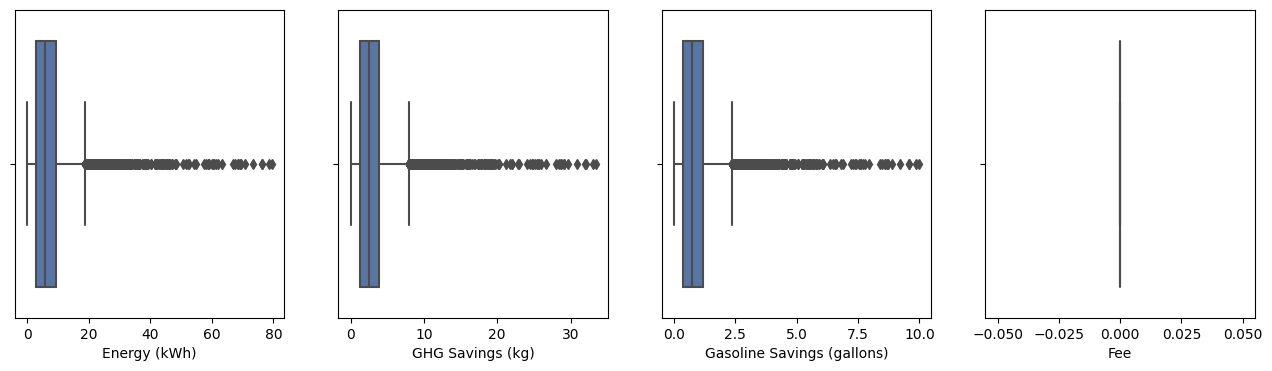

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Energy (kWh)", "GHG Savings (kg)", "Gasoline Savings (gallons)","Fee"]):
    sns.boxplot(x=Data[col], ax=ax[axid])

From the boxplot, we can say that Energy, GHG Savings and Gasoline savings are **right skewed**.

Is there a correlation between Energy and GHG(Green House Gases) savings?

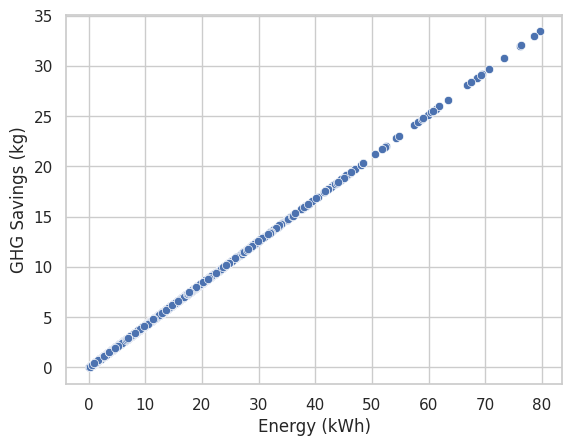

In [9]:
sns.scatterplot(x=Data['Energy (kWh)'], y = Data['GHG Savings (kg)'])
plt.show()

Is there a correlation between Energy and Gasoline savings?

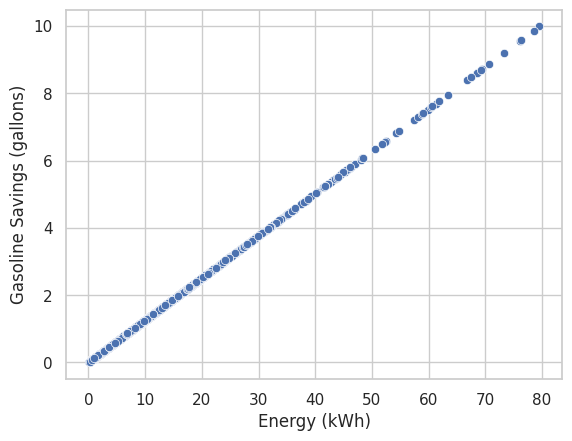

In [10]:
sns.scatterplot(x=Data['Energy (kWh)'], y = Data['Gasoline Savings (gallons)'])
plt.show()

GHG savings, Gasoline savings are almost perfectly correlated with Energy. Thus these columns can be ignored as they contain repetitive information.

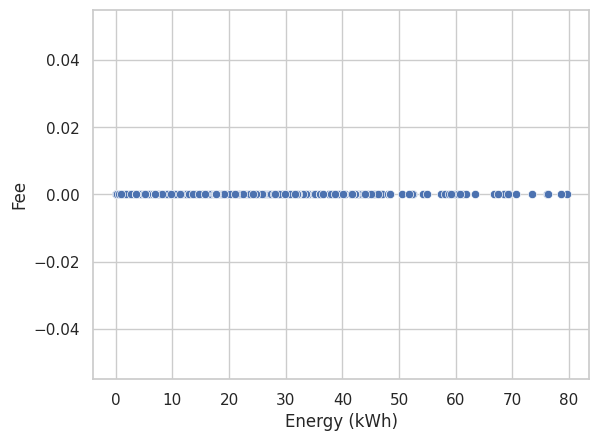

In [11]:
sns.scatterplot(x=Data['Energy (kWh)'], y = Data['Fee'])
plt.show()

Checking for NULL values in the dataset

In [12]:
Data.isnull().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)        0
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              0
Port Number                            0
Plug Type                              0
EVSE ID                            18139
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                1
Latitude                               1
Longitude                              1
Currency        

<ipython-input-14-43b6c8c46219>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=newData.corr(), lw=1)


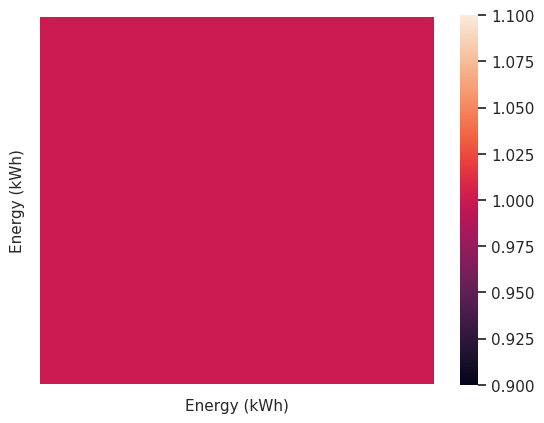

In [14]:
newData = Data[['Station Name','Charging Time (hh:mm:ss)','Port Type','Plug Type','Energy (kWh)']]
sns.heatmap(data=newData.corr(), lw=1)
plt.show()

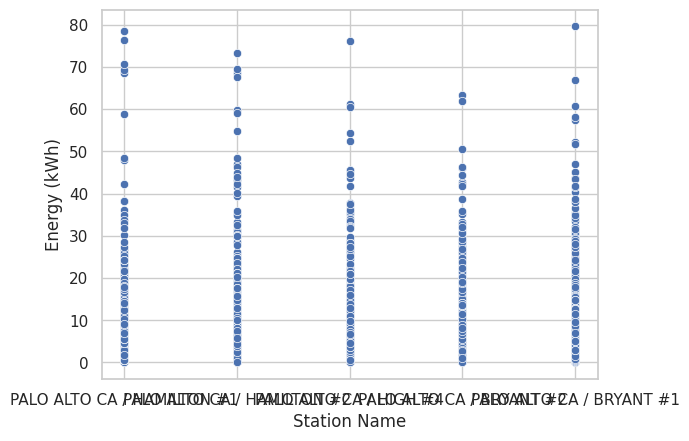

In [18]:
sns.scatterplot(x=Data['Station Name'],y=Data['Energy (kWh)'])
plt.show()

### <center>Data Preprocessing</center>

### <center>Regression Analysis</center>

---

### <center>THE END</center>

---